In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x=pd.read_csv('mnist_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_train.csv'

In [3]:
feature = x.iloc[:, :-1].values  # Features (pixel values)
target = x.iloc[:,:].values   # Target (label)

In [4]:
print(feature.shape)

(59999, 784)


In [5]:
print(target.shape)

(59999, 785)


In [6]:
first_image = feature[3].reshape(28, 28)  # Reshape to 28x28 if each image is 28x28 pixels
first_label = target[3]

In [7]:
print(first_image)

[[  9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253
  113  87 148  55   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  87 232 252 25

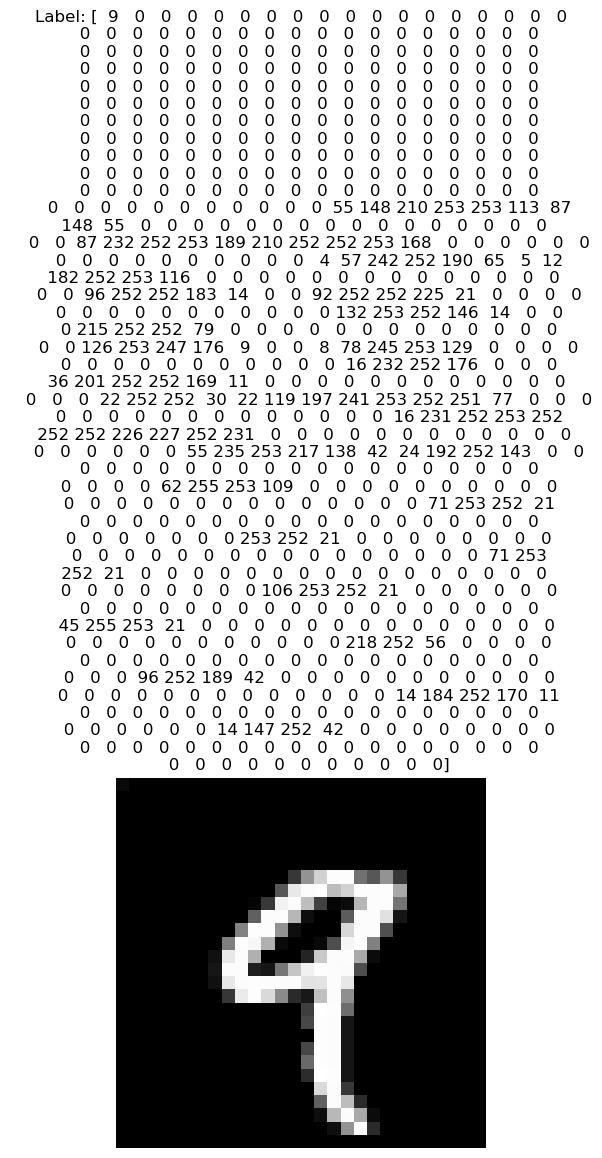

In [9]:
plt.imshow(first_image, cmap='gray')
plt.title(f'Label: {first_label}')
plt.axis('off')  # Hide axes
plt.show()

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# import tensorflow_addons as tfa

# Define a function to change the MNIST label dimension
def change_to_right(wrong_labels):
    right_labels=[]
    for x in wrong_labels:
        for i in range(0,len(wrong_labels[0])):
            if x[i]==1:
                right_labels.append(i)
    return right_labels

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert class vectors to right format
y_train = tf.convert_to_tensor(np.array(change_to_right(keras.utils.to_categorical(y_train, num_classes))))
y_test = tf.convert_to_tensor(np.array(change_to_right(keras.utils.to_categorical(y_test, num_classes))))

df (59999, 785)
x-features (59999, 784)
y-target (59999,)


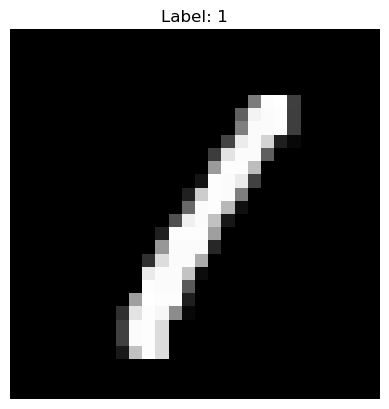

In [5]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('mnist_train.csv')
print("df",df.shape)

x = df.iloc[:, 1:].values  # Feature
print('x-features',x.shape)
y = df.iloc[:, 0].values   # label
print('y-target',y.shape)


first_image = x[2].reshape(28, 28)  # Reshape to 28x28 
first_label = y[2]

# Display the image
plt.imshow(first_image, cmap='gray')
plt.title(f'Label: {first_label}')
plt.axis('off')  # Hide axes
plt.show()


In [6]:

# mnist random label

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
x_train, y_train,x_test, y_test = mnist.load_data() # Reshape to match the input format of the CNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\22anj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.8821 - loss: 0.4353
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9790 - loss: 0.0710
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9868 - loss: 0.0450
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9906 - loss: 0.0318
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9932 - loss: 0.0232


In [18]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Convert predicted classes to text
predicted_text = [str(class_num) for class_num in predicted_classes]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
# Example usage
index = 250
image = x_test[index]
predicted_text = predicted_text[index]
print("Predicted text for image:", predicted_text)

Predicted text for image: 4


In [25]:
print(y_train)

tf.Tensor([5 0 4 ... 5 6 8], shape=(60000,), dtype=int32)


In [26]:
print(y_test)

tf.Tensor([7 2 1 ... 4 5 6], shape=(10000,), dtype=int32)


In [27]:
print(x_train.shape)

(60000, 28, 28, 1)


In [28]:
print(x_test.shape)

(10000, 28, 28, 1)


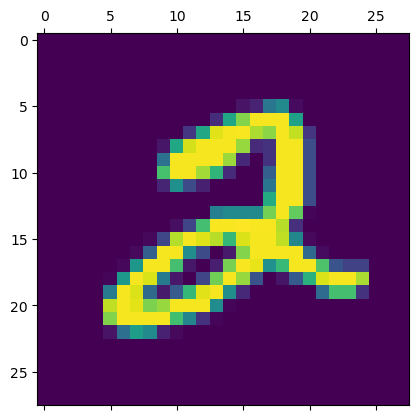

In [30]:
plt.matshow(x_train[5,0:])

In [1]:
from keras.models import Sequential

In [2]:
from keras.layers import SimpleRNN,Dense